In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%matplotlib widget
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [2]:
data = pd.read_csv("/mnt/Data/code/machine_learning/course/intro_to_ML/intro_to_ML/project/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Remove CUST_ID, as it have no effect on the model.

In [4]:
data.drop(columns=['CUST_ID'], inplace=True)

Handle the missing values

In [5]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Two columns: **MINIMUM_PAYMENTS** and **CREDIT_LIMIT** has missing values.

|Column|Missing Numbers|
|-----------|--------------------------|
|**MININUM_PAYMENTS**|313|
|**CREDIT_LIMIT**|1

In [6]:
print(data["CREDIT_LIMIT"].value_counts())
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mode()[0], inplace=True)

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64


Missing value in **CREDIT_LIMIT** is replaced using the mode of values because its values are not continuous values and there exisit only certain number of credit limit.

In [7]:
print(data["MINIMUM_PAYMENTS"].value_counts())
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=True)

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64


Missing values of **MINIMUM_PAYMENT** is replaced with the mean of the values because its values are continuous.

In [8]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
len(data)

8950

Visualize the data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


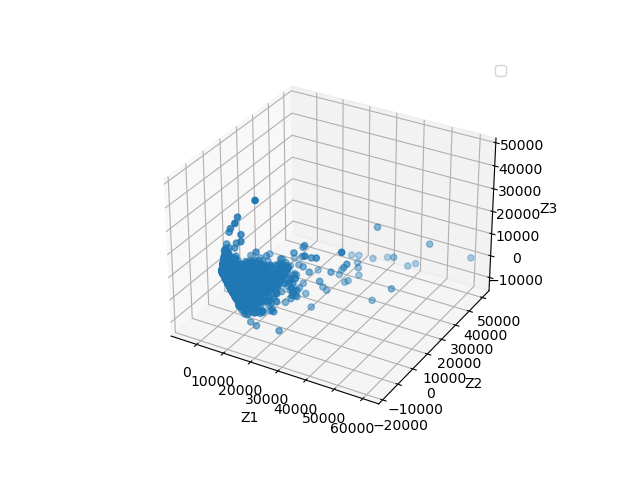

In [10]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(data)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')
ax.legend()
plt.show()

In [11]:
random_states = [10, 20, 30, 40, 50]
num_clusters = range(1, 20)
inertia_history = dict()

for k in num_clusters:
    inertia = list()
    for rs in random_states:
        kmeans = KMeans(n_clusters=k, random_state=rs)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    avg_inertia = np.mean(inertia)
    inertia_history[k] = avg_inertia

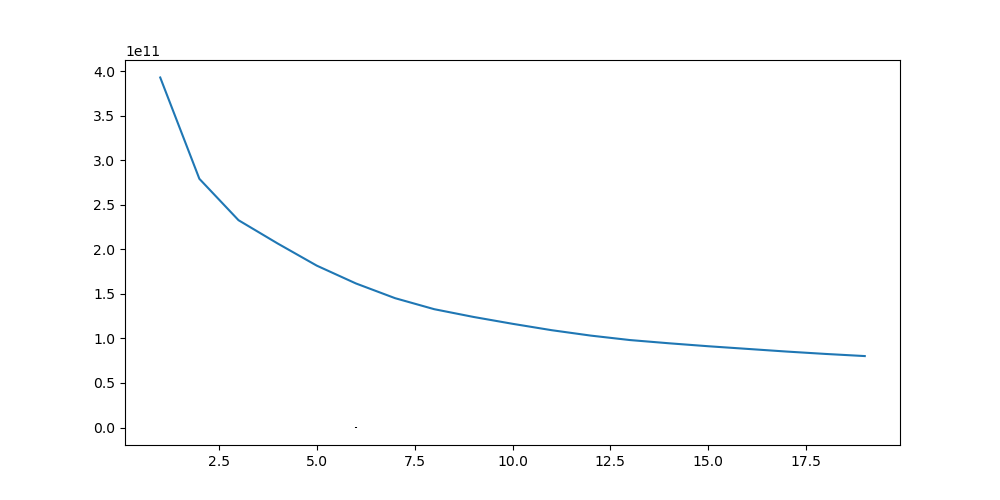

In [12]:
x = list(inertia_history.keys())
y = list(inertia_history.values())
kneedle = KneeLocator(x, y, curve='convex', direction='decreasing')
num_cluster = kneedle.elbow

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.plot([num_cluster, num_cluster], [5000, 450000], 'k--')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=num_cluster, random_state=42)
y_pred = kmeans.fit_predict(data).reshape(-1, 1)

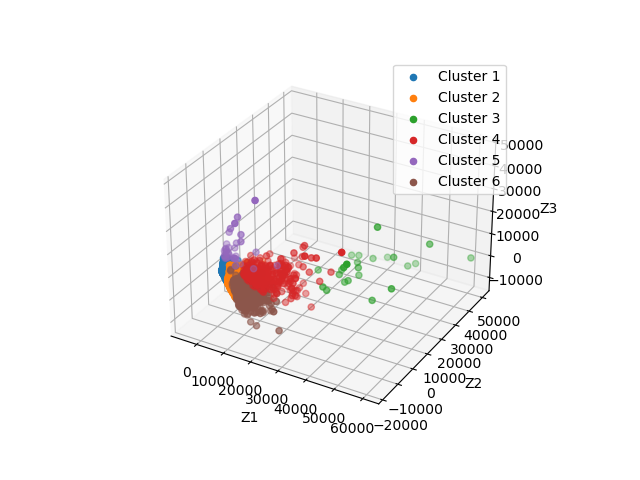

In [14]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(data)
X = np.concatenate([X_reduced, y_pred], axis=1)

fig = plt.figure()
ax = plt.axes(projection="3d")
colors = list(mcolors.TABLEAU_COLORS.keys())
for k in range(num_cluster):
    rows = np.where(X[:, 3] == k)
    ax.scatter3D(X[rows][:, 0], X[rows][:, 1], X[rows][:, 2], label=f"Cluster {k+1}", color=colors[k])
ax.set_xlabel("Z1")
ax.set_ylabel("Z2")
ax.set_zlabel("Z3")
ax.legend()
plt.show()

In [15]:
X = np.concatenate([data, y_pred], axis=1)
result = pd.DataFrame(X, columns=data.columns.tolist() + ["Cluster"]).groupby("Cluster")

In [25]:
result.get_group(0)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.00,12.0,0.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.00,12.0,0.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,2407.246035,0.00,12.0,0.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.00,12.0,0.0
10,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1200.0,1083.301007,2172.697765,0.00,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.50,6.0,0.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,864.206542,0.00,6.0,0.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.25,6.0,0.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.25,6.0,0.0


In [26]:
result.get_group(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,1.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0,1.0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769,116.581583,0.818182,1045.14,227.14,818.00,0.000000,0.727273,0.181818,0.545455,0.000000,0.0,17.0,9000.0,1258.396242,144.115556,0.333333,11.0,1.0
8774,2585.246439,0.909091,338.00,0.00,338.00,0.000000,0.545455,0.000000,0.454545,0.000000,0.0,6.0,9000.0,866.276894,776.501849,0.000000,11.0,1.0
8804,1704.571464,0.800000,0.00,0.00,0.00,4826.892774,0.000000,0.000000,0.000000,0.300000,12.0,0.0,5000.0,573.683142,480.409005,0.000000,10.0,1.0
8813,3335.053583,0.700000,0.00,0.00,0.00,5823.467109,0.000000,0.000000,0.000000,0.300000,3.0,0.0,7000.0,931.371718,1006.983314,0.000000,10.0,1.0


In [27]:
result.get_group(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0.0,216.0,18000.0,23018.57583,18621.013310,0.000000,12.0,2.0
273,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,98.0,11500.0,26652.34432,1971.129435,0.083333,12.0,2.0
501,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0.0,157.0,17000.0,36066.75068,15914.484620,0.083333,12.0,2.0
507,2643.343414,1.000000,26402.39,22257.39,4145.00,0.000000,1.000000,1.000000,0.333333,0.000000,0.0,114.0,16500.0,24529.27662,534.032339,1.000000,12.0,2.0
550,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1.0,101.0,22500.0,46930.59824,2974.069421,0.250000,12.0,2.0
587,2492.726282,1.000000,27957.68,23032.97,4924.71,0.000000,1.000000,1.000000,0.916667,0.000000,0.0,70.0,9000.0,27255.00752,537.372671,1.000000,12.0,2.0
854,4419.302940,1.000000,12551.95,10901.24,1650.71,14896.540510,1.000000,0.666667,1.000000,0.500000,19.0,122.0,17000.0,31698.41902,1448.585054,0.416667,12.0,2.0
941,2072.457624,1.000000,17409.21,11263.17,6146.04,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,175.0,19500.0,19517.16160,517.324081,0.333333,12.0,2.0
970,3108.393701,0.900000,26582.34,15158.90,11423.44,0.000000,0.900000,0.800000,0.800000,0.000000,0.0,55.0,28000.0,26557.09724,586.029097,0.875000,10.0,2.0
1190,1893.611922,1.000000,22746.81,15795.42,6951.39,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,140.0,18000.0,22558.28457,505.125031,1.000000,12.0,2.0


In [28]:
result.get_group(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13.0,13.0,9000.0,9479.043842,1425.426525,0.000000,12.0,3.0
39,1411.602230,0.454545,963.24,963.24,0.00,6173.682877,0.083333,0.083333,0.000000,0.333333,6.0,6.0,7500.0,20071.075440,719.948985,0.333333,12.0,3.0
50,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37.0,9.0,12000.0,8113.297346,1012.415961,0.000000,8.0,3.0
71,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27.0,33.0,7000.0,28232.694460,1107.030803,0.454545,12.0,3.0
102,3539.801912,1.000000,2823.80,1540.41,1283.39,0.000000,0.916667,0.916667,0.833333,0.000000,0.0,75.0,5700.0,9172.788366,2103.796148,0.083333,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8237,2144.040539,1.000000,0.00,0.00,0.00,14127.466640,0.000000,0.000000,0.000000,0.416667,23.0,0.0,3500.0,12571.814660,525.168936,0.300000,12.0,3.0
8315,2648.244646,1.000000,0.00,0.00,0.00,10458.978150,0.000000,0.000000,0.000000,1.000000,123.0,0.0,4000.0,9818.531412,665.888853,0.000000,12.0,3.0
8422,3911.628474,0.875000,0.00,0.00,0.00,11951.903320,0.000000,0.000000,0.000000,0.500000,40.0,0.0,7000.0,7918.877416,905.569605,0.166667,8.0,3.0
8737,2533.618119,0.909091,5633.83,2985.92,2647.91,2451.807788,0.916667,0.500000,0.750000,0.333333,16.0,82.0,9000.0,8176.953944,602.963244,0.000000,12.0,3.0


In [29]:
result.get_group(4)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
34,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,14.0,11000.0,8735.607835,17862.55831,0.0,12.0,4.0
387,7957.017218,1.000000,0.00,0.00,0.00,4909.937494,0.000000,0.000000,0.000000,0.250000,4.0,0.0,9000.0,677.144841,27631.45072,0.0,12.0,4.0
393,11209.370760,1.000000,11147.33,1137.40,10009.93,2728.576925,1.000000,0.250000,1.000000,0.166667,8.0,126.0,11000.0,7932.774020,17494.90735,0.0,12.0,4.0
519,1874.601636,1.000000,305.78,0.00,305.78,0.000000,0.583333,0.000000,0.583333,0.000000,0.0,14.0,1500.0,518.757481,19977.00572,0.0,12.0,4.0
567,3457.086184,1.000000,2448.60,0.00,2448.60,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1700.0,227.514473,38512.12477,0.0,12.0,4.0
666,1418.254924,1.000000,362.13,0.00,362.13,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,19.0,1200.0,496.114334,15914.72154,0.0,12.0,4.0
697,4414.952906,1.000000,419.64,0.00,419.64,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,4200.0,467.204852,24302.09819,0.0,12.0,4.0
1027,2294.145941,1.000000,29.29,0.00,29.29,137.256946,0.083333,0.000000,0.083333,0.083333,2.0,1.0,2100.0,149.363733,17693.07847,0.0,12.0,4.0
1130,6090.522273,1.000000,22.16,22.16,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,9000.0,568.781100,30528.43240,0.0,12.0,4.0
1676,7499.303650,1.000000,350.57,350.57,0.00,948.293789,0.083333,0.083333,0.000000,0.250000,6.0,3.0,7500.0,1326.434054,19060.53475,0.0,12.0,4.0


In [30]:
result.get_group(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,64.0,13500.0,6354.314328,198.065894,1.000000,12.0,5.0
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4.0,11.0,8000.0,1993.439277,2109.906490,0.000000,12.0,5.0
18,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0.0,9.0,13000.0,1720.837373,744.613395,0.000000,12.0,5.0
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6.0,92.0,11250.0,2077.959051,1659.775075,0.000000,12.0,5.0
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16.0,8.0,10500.0,1601.448347,1648.851345,0.000000,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0.0,130.0,10000.0,1942.074765,702.905059,0.083333,12.0,5.0
8584,4696.525962,0.875000,604.33,435.00,169.33,6400.248453,0.500000,0.375000,0.125000,0.375000,7.0,5.0,8000.0,840.965985,930.049801,0.000000,8.0,5.0
8705,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19.0,0.0,9000.0,3824.308564,2214.506825,0.000000,12.0,5.0
8743,40.960739,0.181818,472.75,431.37,41.38,0.000000,0.181818,0.181818,0.090909,0.000000,0.0,7.0,13000.0,0.000000,864.206542,0.000000,11.0,5.0
